In [7]:
#import packages
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [8]:
#load in data and adjust column names
data_frame0 = pd.read_csv("43.6.txt",delimiter="\t")

data_frame0 = data_frame0.drop(axis = "columns", columns = "Year")
data_frame0 = data_frame0.rename(columns={'Single Race 6': 'Race', 'Year Code' : 'Year' }) #correct names so code works
data_frame0 = data_frame0[data_frame0['Year'] != 2023]

In [9]:
data_frame0=data_frame0.replace("Unreliable",np.nan)

In [10]:
#preview data
data_frame0[(data_frame0["Gender"] == "Male")]

,Notes,Gender,Gender Code,Year,Deaths,Population,Crude Rate
7,NaN,Male,M,2018.0,8901.0,1.611287e+08,5.5
8,NaN,Male,M,2019.0,11434.0,1.616573e+08,7.1
9,NaN,Male,M,2020.0,16947.0,1.622562e+08,10.4
10,NaN,Male,M,2021.0,23319.0,1.643847e+08,14.2
11,NaN,Male,M,2022.0,24766.0,1.652836e+08,15.0
13,Total,Male,M,NaN,102652.0,1.145278e+09,9.0


In [11]:
#load in race data and adjust column names
data_frame = pd.read_csv("T43.6_TLW.txt",delimiter="\t")

data_frame = data_frame.drop(axis = "columns", columns = "Year")
data_frame = data_frame.rename(columns={'Single Race 6': 'Race', 'Year Code' : 'Year' }) #correct names so code works
data_frame = data_frame[data_frame['Year'] != 2023]

In [12]:
data_frame=data_frame.replace("Unreliable",np.nan)

In [13]:
#define variables for national data
CF2 = data_frame0[(data_frame0["Gender"] == "Female") &
                (data_frame0["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CM2 = data_frame0[(data_frame0["Gender"] == "Male") &
                (data_frame0["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CF = data_frame0[(data_frame0["Gender"] == "Female")] [["Year", "Crude Rate"]].astype(float)
CM = data_frame0[(data_frame0["Gender"] == "Male")][["Year", "Crude Rate"]].astype(float)

In [14]:
#define variables for race data
CF2b = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Race"] == "Black or African American")&
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CM2b = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Race"] == "Black or African American")&
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CFb = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Race"] == "Black or African American")&
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CMb = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Race"] == "Black or African American")&
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)


CF2w = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Race"] == "White")&
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CM2w = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Race"] == "White")&
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CFw = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Race"] == "White")&
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CMw = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Race"] == "White")&
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)


CF2a = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Race"] == "Asian")&
           (data_frame["Notes"] != "Total") ][["Year", "Crude Rate"]].astype(float)
CM2a = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Race"] == "Asian")&
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CFa = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Race"] == "Asian")&
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CMa = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Race"] == "Asian")&
           (data_frame["Notes"] != "Total") & (data_frame["Crude Rate"] != "NaN")][["Year", "Crude Rate"]].astype(float)

CF2n = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Race"] == "American Indian or Alaska Native")&
           (data_frame["Notes"] != "Total") ][["Year", "Crude Rate"]].astype(float)
CM2n = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Race"] == "American Indian or Alaska Native")&
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CFn = data_frame[(data_frame["Gender"] == "Female") & (data_frame["Race"] == "American Indian or Alaska Native")&
           (data_frame["Notes"] != "Total")][["Year", "Crude Rate"]].astype(float)
CMn = data_frame[(data_frame["Gender"] == "Male") & (data_frame["Race"] == "American Indian or Alaska Native")&
           (data_frame["Notes"] != "Total") & (data_frame["Crude Rate"] != "NaN")][["Year", "Crude Rate"]].astype(float)

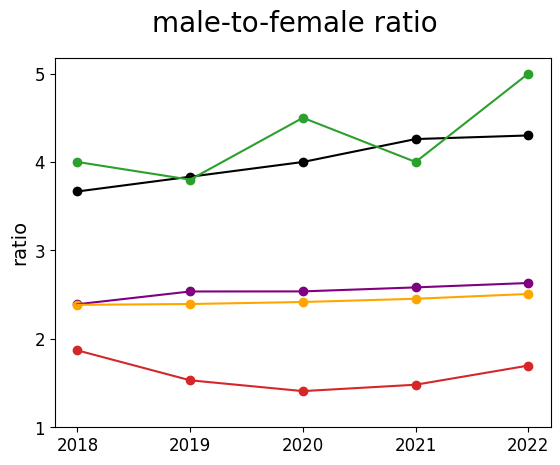

In [16]:
#plot ratios for national data and each race data
plt.figure()
xr=CM["Year"]
yr=CM["Crude Rate"].div(CF["Crude Rate"].values)
plt.plot(xr, yr, color="purple")
plt.scatter(xr, yr, color='purple')

xrb=CMb["Year"]
yrb=CMb["Crude Rate"].div(CFb["Crude Rate"].values)
plt.plot(xrb, yrb, color="black")
plt.scatter(xrb, yrb, color="black")

xrw=CMw["Year"]
yrw=CMw["Crude Rate"].div(CFw["Crude Rate"].values)
plt.plot(xrw, yrw, color="orange")
plt.scatter(xrw, yrw, color="orange")

xra=CMa["Year"]
yra=CMa["Crude Rate"].div(CFa["Crude Rate"].values)
plt.plot(xra, yra, color="tab:green")
plt.scatter(xra, yra, color="tab:green")

xrn=CMn["Year"]
yrn=CMn["Crude Rate"].div(CFn["Crude Rate"].values)
plt.plot(xrn, yrn, color="tab:red")
plt.scatter(xrn, yrn, color="tab:red")

plt.xticks(np.arange(2018, 2022.5, 1.0))
plt.suptitle('male-to-female ratio', fontsize=20)
plt.yticks(np.arange(1.0, 5.1, 1.0))
plt.yticks(fontsize=12, rotation=0)
plt.xticks(fontsize=12, rotation=0)
plt.ylabel("ratio", fontsize=14)

#plt.savefig('T43.6_RatioRacesb2_R.png')